In [ ]:
#    Copyright 2020, 37.78 Tecnologia Ltda.
#
#    Licensed under the Apache License, Version 2.0 (the "License");
#    you may not use this file except in compliance with the License.
#    You may obtain a copy of the License at
#
#        https://www.apache.org/licenses/LICENSE-2.0
#
#    Unless required by applicable law or agreed to in writing, software
#    distributed under the License is distributed on an "AS IS" BASIS,
#    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#    See the License for the specific language governing permissions and
#    limitations under the License.

## MIMIC-III Discharge Summaries statistics

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.realpath('MIMIC_preprocessing.py'))))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

import utils 
import model_functions as fun

from constants import DATA_DIR

%matplotlib inline

In [3]:
# Load MIMIC data

df_mimic = pd.read_pickle(DATA_DIR+'mimic3_data.pkl')

# Get ICDs
hist_mimic = utils.make_icds_histogram(df_mimic)
all_icds_mimic = hist_mimic.index.tolist()

print(f'Total Discharge Summaries and unique HADM_IDs selected: {df_mimic.shape[0]}')

Total Discharge Summaries and unique HADM_IDs selected: 52722


In [4]:
## Apply preprocessor

df_mimic['TEXT'] = df_mimic['TEXT'].pipe(utils.preprocessor_word2vec)

###### Average words per sample after preprocessing

In [5]:
avg_mimic = df_mimic['TEXT'].str.len().mean()

print(f'Average words per sample MIMIC: {avg_mimic:.2f}')

Average words per sample MIMIC: 1327.50


##### Plot word counting cumsum

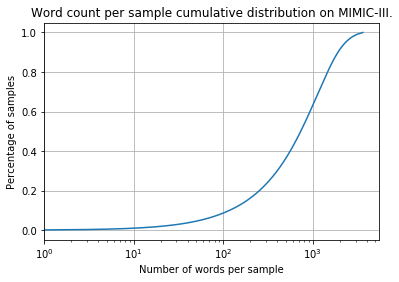

In [6]:
ax = (df_mimic
 .TEXT
 .apply(len).value_counts(normalize=True)
 .cumsum()
 .reset_index()
 .drop('index',axis=1)
 .plot(legend=False, logx=True)
);


ax.set_xlabel('Number of words per sample')
ax.set_ylabel('Percentage of samples')
ax.set_title('Word count per sample cumulative distribution on MIMIC-III.')

ax.grid()

ax.set_xlim(1)

fig = ax.get_figure()

##### Plot document length histogram

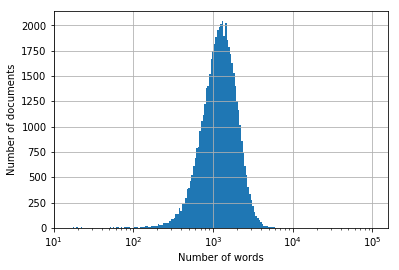

In [7]:
bin_list = np.logspace(1,5,num=200)

ax = (df_mimic
       .TEXT
       .apply(len)
       .plot
       .hist(bins=bin_list,logx=True)
);

ax.set_xlabel('Number of words')
ax.set_ylabel('Number of documents')
ax.set_xlim(left=10e0)
ax.grid()

fig = ax.get_figure()

#### ICD stats

In [8]:
print(f'Total unique ICD codes: {df_mimic.ICD9_CODE.explode().unique().shape[0]}')

Total unique ICD codes: 6918


In [9]:
MIMIC_AVG = df_mimic.ICD9_CODE.explode().shape[0]/df_mimic.shape[0]

print(f'Average ICD codes per sample: {MIMIC_AVG:.2f}')

Average ICD codes per sample: 11.74


##### Plot ICD histogram

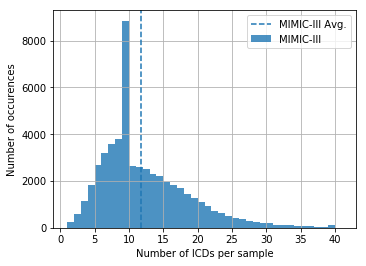

In [10]:
icd_bins= np.linspace(1,41,41,dtype='int32')

ax = (df_mimic
      .ICD9_CODE
      .apply(lambda x: len(x))
      .plot
      .hist(bins=icd_bins, alpha=0.8)
     )

ax.set_xlabel('Number of ICDs per sample')
ax.set_ylabel('Number of occurences')
ax.axvline(MIMIC_AVG, linestyle='--', color='C0')
ax.legend(['MIMIC-III Avg.','MIMIC-III'])
ax.grid()

fig = ax.get_figure()
fig.subplots_adjust(left=0.15, right=0.85)

##### ICD imbalance

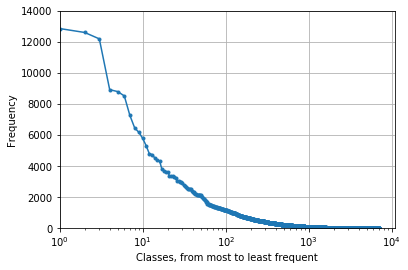

In [11]:
mimic_vals = hist_mimic.values.tolist()

plt.semilogx(range(len(mimic_vals)),mimic_vals,'.-')

plt.xlim(1)
plt.ylim(0,14000)

plt.grid()
plt.xlabel('Classes, from most to least frequent')
plt.ylabel('Frequency')
plt.show()

##### Percentage of samples in which nth most occurrent ICDs are found

In [12]:
for index in [0,9,99,999]:
    print(f'''
    {index+1}th ICD: {100*mimic_vals[index]/df_mimic.shape[0]:.2f} %
    ''')


    1th ICD: 38.02 %
    

    10th ICD: 11.67 %
    

    100th ICD: 2.23 %
    

    1000th ICD: 0.15 %
    
